[-0.44736842 -0.47368421 -0.42105263 ... -0.73684211 -0.78947368
 -0.73684211]
[7.15594278e-01 8.76775870e-02 8.28601734e+01 1.00569476e+02
 4.30051562e+02 1.48568006e+01 3.89287709e-02]


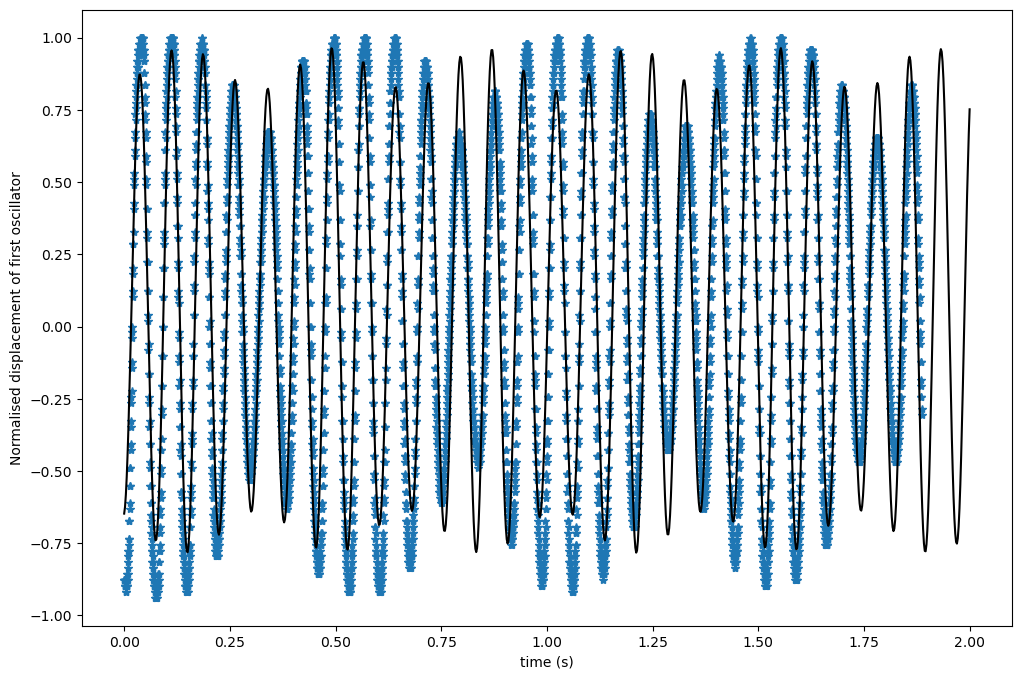

[[ 3.40231815e-05  3.57923397e-07 -7.08114600e-07 -2.82419497e-06
   3.67816676e-05  5.61480707e-07 -1.62403257e-07]
 [ 3.57923397e-07  3.40643822e-05 -1.14024971e-06  1.55211802e-06
  -2.05333908e-04 -2.25936118e-06 -2.29767477e-09]
 [-7.08114600e-07 -1.14024971e-06  2.20948809e-04  6.50371345e-05
   1.34086603e-02  1.24728881e-04  1.77115219e-06]
 [-2.82419497e-06  1.55211801e-06  6.50371345e-05  1.46378425e-02
  -9.48013117e-01 -1.14515649e-02  8.34375217e-07]
 [ 3.67816676e-05 -2.05333908e-04  1.34086604e-02 -9.48013117e-01
   6.29025957e+01  7.56855413e-01  9.86613044e-05]
 [ 5.61480707e-07 -2.25936118e-06  1.24728881e-04 -1.14515649e-02
   7.56855413e-01  9.11277531e-03  8.94029694e-07]
 [-1.62403257e-07 -2.29767477e-09  1.77115219e-06  8.34375217e-07
   9.86613044e-05  8.94029694e-07  1.69189240e-05]]


In [23]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def oscillator(t, A, B, omega_plus, omega_minus, phi, d, C):
    return A*np.cos(omega_plus*(t-d)+phi) + B*np.cos(omega_minus*(t-d)+phi) + C



    # figure, axis = plt.subplots(10, 5, figsize=(20, 20))


    # for j in range(1, 51):
filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
data = np.genfromtxt(filename, skip_header=300, delimiter=',')
# print(data)
# new_data = []
# for i in range(len(data)):
#     values = data[i].split(',')
#     values = [v.replace(' ', '') for v in values]
#     values = [v for v in values if v]
#     for v in values:
#         new_data.append(float(v))
# new_data = np.array(new_data)
# new_data = new_data.reshape(4718, 4)

t1 = data[:, 0] # first wave
t1 = t1 - t1[0]
y1 = data[:, 1] # first wave
y1 = y1 / np.max(y1)
t2 = data[:, 2] # second wave
t2 = t2 - t2[0]
y2 = data[:, 3] # second wave
y2 = y2 / np.max(y2)
print(y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, p0=(0.518233,0.253858,80.3644, 99.8406,290.47,13.5511, 0.0261785), maxfev=1000000)
popt2, pcov2 = curve_fit(oscillator, t2, y2, p0=(0.518233,0.253858,80.3644, 99.8406,290.47,13.5511, 0.0261785), maxfev=1000000)
print(popt1)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
A_1 = abs(A_1)
B_1 = abs(B_1)
A_2 = abs(A_2)
B_2 = abs(B_2)
# print(popt1)
# Should the constants be always positive? TODO
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
plt.figure(figsize=(12,8))    
plt.plot(t2, y2, '*')
plt.plot(curve_t2, curve_y2, 'black')

plt.xlabel('time (s)')
plt.ylabel(f'Normalised displacement of first oscillator')
# plt.savefig(f"{file}_{wave}.png",dpi=300)
plt.show()
print(pcov1)
def sine(t, A, omega, phi, C):
    return A*np.sin(omega*t+phi) + C





        
      

In [21]:
import numpy as np

# Create a 2D array
filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
data = np.genfromtxt(filename, skip_header=18, delimiter=',')

# Slice the array to keep every 5th row
data_reduced = data[::2]
np.savetxt('reduced.csv', data_reduced, delimiter=',')
